# Getting Deep in That Tinder Data

By David Curry   
August, 2019

This notebook will explore Tinder profile data that is available for any user by request from: https://account.gotinder.com/data.

A few open questions:

1) What fields are in the dataset?

2) How granular does the data go?

3) How will future generations judge me from my Tinder data?


The data format is JSON.  Ultimately, I would like to prepare the data for usse in a Sankeymatic (http://sankeymatic.com) plot.  Lets get started.

### Imports

In [36]:
import pandas as pd
import matplotlib as plt
import seaborn as sb

### Data Path

In [3]:
infile = '/Users/hal3000/Downloads/myData/data.json'

## Load the my Tinder data (what could be in it?)

In [13]:
# Load the Tinder Data
df = pd.read_json(infile, lines=True)

In [27]:
usage = pd.read_json(df['Usage'].to_json(), orient='rows').T

In [28]:
usage

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
0,"{'2017-12-28': 24, '2017-12-29': 30, '2017-12-...","{'2017-12-28': 0, '2017-12-29': 0, '2017-12-30...","{'2017-12-28': 0, '2017-12-29': 0, '2017-12-30...","{'2017-12-28': 0, '2017-12-29': 0, '2017-12-30...","{'2017-12-28': 85, '2017-12-29': 615, '2017-12...","{'2017-12-28': 1225, '2017-12-29': 1235, '2017..."


## Looks we have 6 fields relating to swiping and messaging.
Lets focus on app_opens (usage over time)

In [56]:
app_opens = pd.read_json(usage['app_opens'].to_json())

In [57]:
# reindex the date range toi handle missing dates when no usage took place.
idx = pd.date_range('12-28-2017', '08-01-2019')
app_opens = app_opens.reindex(idx, fill_value=0)

## Plot Tinder usage over time

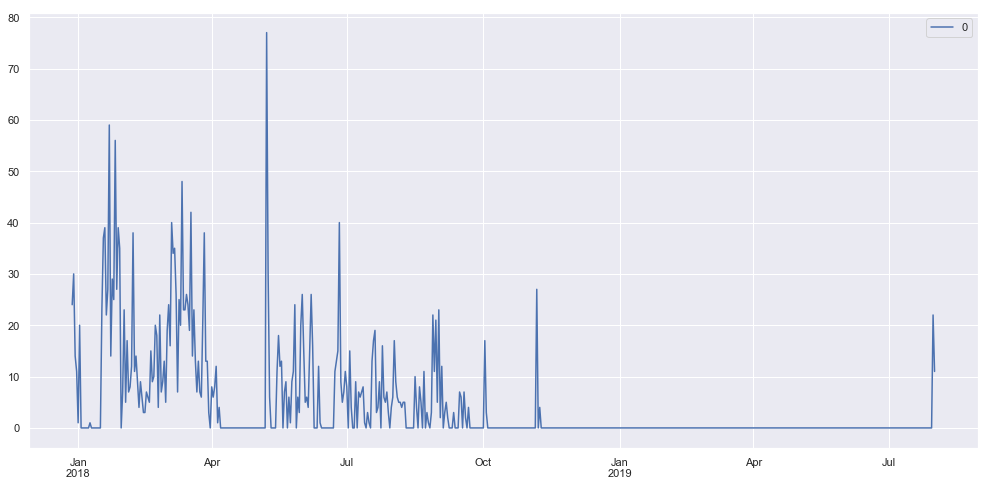

In [60]:
sb.set(rc={'figure.figsize':(17, 8)})
app_opens.plot()